*7.30.2023 PM Sunday*

<div class="alert alert-block alert-success">
<center><h1><b> Datathon Software Category Exploratory Data Analysis / Data Understanding </b></h1></center>
<center><h2><b> Part II </b></h2></center>

<br/> 


Objectives:

    *   Understand the data with a) Descriptive/Summary Statistics and b) Data Visualization (graphs/charts/tables)
    *   Determine if data makes sense
    *   Identify data patterns/trends/gain insights    
    *   Identify key Vars
    *   Determine if data wrangling/cleaning/scrub is needed (identify imperfections/probls in the data)
    

</div>

***

# Data Collection

## Imports and dataset extraction

> Getting started

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow


In [3]:
# Rod's standard variable for a DataFrame is ds as acronym for data set

datathon_eda_sw_industry_reviews_file = "/Users/dslab/datathon_73023_AM.parquet"
ds = pd.read_parquet(datathon_eda_sw_industry_reviews_file, engine='pyarrow')


# Adding m for Metadata Data Set

datathon_eda__sw_industry_metadata_file = "/Users/dslab/Downloads/metadata_industry.parquet"
mds = pd.read_parquet(datathon_eda__sw_industry_metadata_file, engine='pyarrow')


In [4]:
mds['asin'].describe()

count            303
unique           300
top       B00005ASHD
freq               2
Name: asin, dtype: object

In [5]:
ds['asin'].describe()

count         292055
unique         13209
top       B00CTTEKJW
freq            7929
Name: asin, dtype: object

## EDA 

> Beging working with smaller data sets

In [5]:
mds.head()

,also_buy,also_view,asin,brand,category,date,description,details,feature,fit,image,main_cat,price,rank,similar_item,tech1,tech2,title
4371,[],[],B00005ASHD,Smiles Productions,"[CDs & Vinyl, Special Interest, Instructional]",</div>,"[Arrive in Israel at the airport, catch a taxi...","{' Item Weight: ': None, ' Packag...",[],,[],Software,,"40,216 in Software (",,,,Speak Hebrew! (Jewel Case) [Old Version]
4388,[],[],B00005ASHC,Smiles Productions,"[CDs & Vinyl, Special Interest, Instructional]",</div>,[Designed by University of Washington Persian ...,"{' Item Weight: ': None, ' Packag...",[],,[],Software,,"45,706 in Software (",,,,Persian Tutor (Jewel Case)
4404,[],[],B00005ASUO,Chandos Multimedia,"[CDs & Vinyl, Classical, Chamber Music]",</div>,[],"{' Item Weight: ': None, ' Packag...",[],,[],Software,,"56,299 in Software (",,,,"Cultural Heritage Series, Vol. 1: Shostakovich..."
3097,[],[],B00BKD2KY0,Individual Software,"[Office Products, Office & School Supplies, Ed...",</div>,[Professor Teaches Office 2013 & Windows 8 is ...,"{' Item Weight: ': None, ' Packag...",[Fast & Easy Learning for Windows 8 & Office 2...,,[],Software,,"7,417 in Software (",,,,Professor Teaches Office 2013 and Win 8
7254,[],[],B00C1MZ3TI,Kurzweil,"[Office Products, Office & School Supplies, Ed...",</div>,[Special Inventory Clearance Sale! Kurzweil 30...,"{' Item Weight: ': None, ' Packag...","[The premier reading,writing and learning soft...",,[],Software,,"23,814 in Software (",,,,Kurzweil 3000 Version 11 Professional B/w Full...


In [7]:
mds.shape

(303, 18)

In [9]:
mds['asin'].describe()

count            303
unique           300
top       B00005ASHD
freq               2
Name: asin, dtype: object

In [3]:
ds.head()

,asin,score,reviewText,reviewerID,summary,timestamp,verified,date,year,month,day,day_of_week
0,0671573535,1,We have not been able to even run this game be...,A1I7E79WGWUP6Y,don't buy this game,1998-12-04,false,1998-12-04,1998,12,4,4
1,1559404779,4,About 140 movies were reviewed. I love the fil...,A3KDTS7917RNBA,Good reference book for Criterion early LD's,1999-10-23,false,1999-10-23,1999,10,23,5
2,B00002S5B2,5,WOW! (and I mean that). This game is fantastic...,A39CQ908D0IA6P,An excellent music activity game for kids AND ...,1999-11-10,false,1999-11-10,1999,11,10,2
3,B00002S8D6,5,Sick of Microsoft's Blue Screen Of Death? Get...,A1F0L19M8TK50Q,No more BSOD!,1999-11-10,false,1999-11-10,1999,11,10,2
4,B00002S946,2,I bought it mainly to assist in translation of...,A28CW8ZT3N3O2D,Unimpressive,1999-11-12,false,1999-11-12,1999,11,12,4


In [4]:
ds.shape

(292055, 12)

In [5]:
# Feature engineering by addign a constant that can be useful later

ds['cnt'] = pd.Series([1 for x in range(len(ds.index))])
ds.head(1)

,asin,score,reviewText,reviewerID,summary,timestamp,verified,date,year,month,day,day_of_week,cnt
0,0671573535,1,We have not been able to even run this game be...,A1I7E79WGWUP6Y,don't buy this game,1998-12-04,false,1998-12-04,1998,12,4,4,1


In [6]:
# Data set to understand scoring over a timeline

score_timeline = ds[['date', 'year', 'cnt', 'score']]
score_timeline.head()

,date,year,cnt,score
0,1998-12-04,1998,1,1
1,1999-10-23,1999,1,4
2,1999-11-10,1999,1,5
3,1999-11-10,1999,1,5
4,1999-11-12,1999,1,2


In [7]:
score_timeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292055 entries, 0 to 292054
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    292055 non-null  datetime64[ns]
 1   year    292055 non-null  int64         
 2   cnt     292055 non-null  int64         
 3   score   292055 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 8.9 MB


In [8]:
one_hot_for_score = pd.get_dummies(score_timeline['score'])
one_hot_for_score.head()

,1,2,3,4,5
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,1,0,0,0


In [9]:
# A single data frame but with the scores spread through one hot encoding

nds = pd.concat([score_timeline, one_hot_for_score], axis=1, join='outer')
nds.head()

,date,year,cnt,score,1,2,3,4,5
0,1998-12-04,1998,1,1,1,0,0,0,0
1,1999-10-23,1999,1,4,0,0,0,1,0
2,1999-11-10,1999,1,5,0,0,0,0,1
3,1999-11-10,1999,1,5,0,0,0,0,1
4,1999-11-12,1999,1,2,0,1,0,0,0


In [37]:
nds.rename(columns={1:'one',2:'two',3:'three',4:'four',5:'five'}, inplace = True)
nds.head(1)

,date,year,cnt,score,one,two,three,four,five
0,1998-12-04,1998,1,1,1,0,0,0,0


In [38]:
x = nds.copy()
x.shape

(292055, 9)

In [46]:
xtwo = nds[0:11]
xtwo.shape

(11, 9)

In [47]:
xtwo

,date,year,cnt,score,one,two,three,four,five
0,1998-12-04,1998,1,1,1,0,0,0,0
1,1999-10-23,1999,1,4,0,0,0,1,0
2,1999-11-10,1999,1,5,0,0,0,0,1
3,1999-11-10,1999,1,5,0,0,0,0,1
4,1999-11-12,1999,1,2,0,1,0,0,0
5,1999-11-14,1999,1,1,1,0,0,0,0
6,1999-11-15,1999,1,5,0,0,0,0,1
7,1999-11-16,1999,1,4,0,0,0,1,0
8,1999-11-16,1999,1,4,0,0,0,1,0
9,1999-11-17,1999,1,4,0,0,0,1,0


<AxesSubplot:xlabel='date', ylabel='one'>

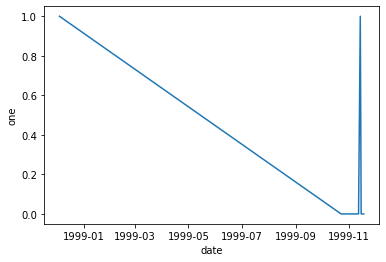

In [48]:
sns.lineplot(x = 'date', y = 'one', data = xtwo)

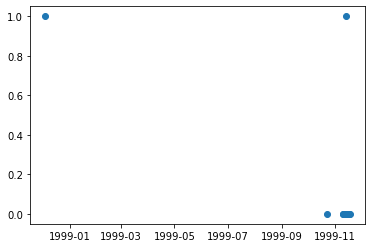

In [49]:
y = xtwo['one']
x = xtwo['date']
plt.scatter(x,y);

<AxesSubplot:>

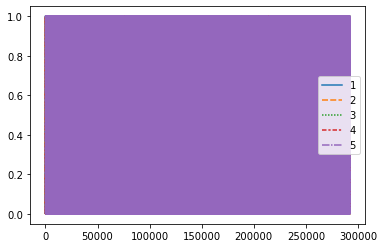

In [17]:
#sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(nds, [1,2]))

sns.lineplot(data=nds[[1, 2, 3, 4, 5]])

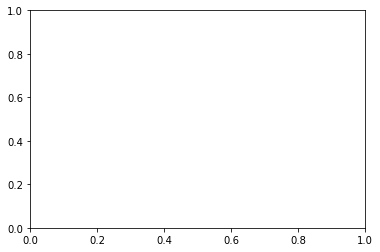

In [31]:
sns.lineplot(x='year', y='score', hue='variable', data=nds.melt(nds, ['year']));

In [26]:
# sns.lineplot(x='date', y = nds[nds['1', '2', '3', '4', '5']], data=nds)

In [26]:
# group trial

#grp_nds = nds.groupby(pd.Grouper(key='date', axis=0, freq='M')).sum()
#grp_nds.info()


In [ ]:
sns.lineplot(data=df[['col1', 'col2', 'col3']]

In [27]:
#grp_nds

In [30]:
nds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292055 entries, 0 to 292054
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    292055 non-null  datetime64[ns]
 1   year    292055 non-null  int64         
 2   cnt     292055 non-null  int64         
 3   score   292055 non-null  int64         
 4   1       292055 non-null  uint8         
 5   2       292055 non-null  uint8         
 6   3       292055 non-null  uint8         
 7   4       292055 non-null  uint8         
 8   5       292055 non-null  uint8         
dtypes: datetime64[ns](1), int64(3), uint8(5)
memory usage: 10.3 MB


In [31]:
#plt.figure(figsize=(20,6))
#sns.lineplot(x= 'date' , y= 1, data=nds).set_title('Score for TBD Timeline')
#plt.show;

In [37]:
one_star = nds[nds[1] == 1]
one_star.tail()

,date,year,cnt,score,1,2,3,4,5
292049,2018-08-25,2018,1,1,1,0,0,0,0
292051,2018-08-26,2018,1,1,1,0,0,0,0
292052,2018-08-27,2018,1,1,1,0,0,0,0
292053,2018-08-27,2018,1,1,1,0,0,0,0
292054,2018-08-27,2018,1,1,1,0,0,0,0


In [38]:
one_star.shape

(65763, 9)

In [10]:
one_star = score_timeline[score_timeline['score'] == 1]
one_star.tail()


,score,date,cnt
292049,1,2018-08-25,1
292051,1,2018-08-26,1
292052,1,2018-08-27,1
292053,1,2018-08-27,1
292054,1,2018-08-27,1


In [11]:
one_star.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65763 entries, 0 to 292054
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   score   65763 non-null  int64         
 1   date    65763 non-null  datetime64[ns]
 2   cnt     65763 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.0 MB


In [12]:
grp_one_stardf = one_star.groupby(pd.Grouper(key='date', axis=0, freq='M')).sum()
grp_one_stardf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 237 entries, 1998-12-31 to 2018-08-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   score   237 non-null    int64
 1   cnt     237 non-null    int64
dtypes: int64(2)
memory usage: 5.6 KB


In [13]:
grp_one_stardf.tail()

,score,cnt
date,,
2018-04-30,172,172
2018-05-31,97,97
2018-06-30,65,65
2018-07-31,56,56
2018-08-31,60,60


In [14]:
grp_one_stardf.isnull().sum()

score    0
cnt      0
dtype: int64

In [15]:
grp_one_stardf.max()

score    1076
cnt      1076
dtype: int64

In [16]:
check_zeros = grp_one_stardf[grp_one_stardf['score'] < 1]
check_zeros

,score,cnt
date,,
1999-01-31,0,0
1999-02-28,0,0
1999-03-31,0,0
1999-04-30,0,0
1999-05-31,0,0
1999-06-30,0,0
1999-07-31,0,0
1999-08-31,0,0
1999-09-30,0,0


In [17]:
indexzero = grp_one_stardf[ (grp_one_stardf['score'] == 0)].index
grp_one_stardf.drop(indexzero , inplace=True)

In [18]:
grp_one_stardf

,score,cnt
date,,
1998-12-31,1,1
1999-11-30,3,3
1999-12-31,10,10
2000-01-31,7,7
2000-02-29,11,11
...,...,...
2018-04-30,172,172
2018-05-31,97,97
2018-06-30,65,65


In [19]:
check_zeros = grp_one_stardf[grp_one_stardf['score'] < 1]
check_zeros

,score,cnt
date,,


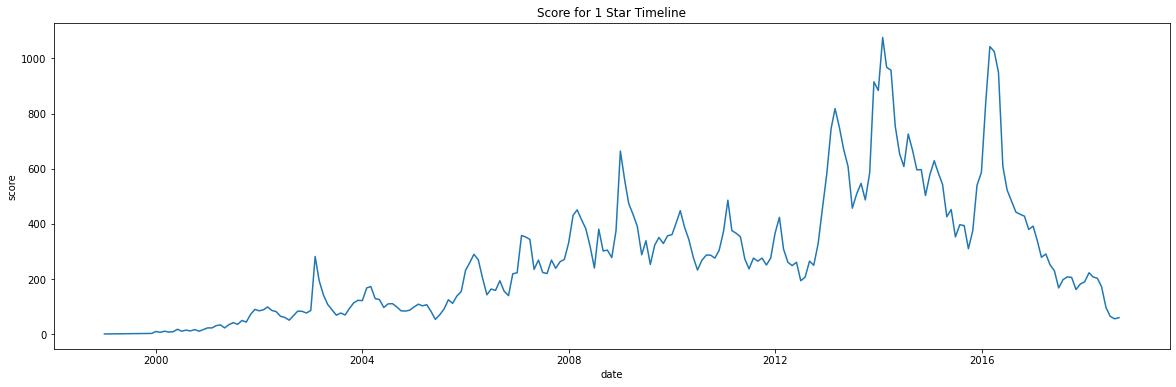

In [20]:
plt.figure(figsize=(20,6))
sns.lineplot(x= 'date' , y= 'score', data=grp_one_stardf).set_title('Score for 1 Star Timeline')
plt.show;

In [22]:
# Now to view all scores together

grp_scores_stardf = score_timeline.groupby(pd.Grouper(key='date', axis=0, freq='M')).sum()
grp_scores_stardf.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 237 entries, 1998-12-31 to 2018-08-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   score   237 non-null    int64
 1   cnt     237 non-null    int64
dtypes: int64(2)
memory usage: 5.6 KB


In [23]:
grp_scores_stardf.head()

,score,cnt
date,,
1998-12-31,1,1
1999-01-31,0,0
1999-02-28,0,0
1999-03-31,0,0
1999-04-30,0,0


In [24]:
grp_scores_stardf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 237 entries, 1998-12-31 to 2018-08-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   score   237 non-null    int64
 1   cnt     237 non-null    int64
dtypes: int64(2)
memory usage: 5.6 KB


In [25]:
grp_scores_stardf.tail()

,score,cnt
date,,
2018-04-30,2720,742
2018-05-31,1984,519
2018-06-30,1258,331
2018-07-31,864,231
2018-08-31,465,149


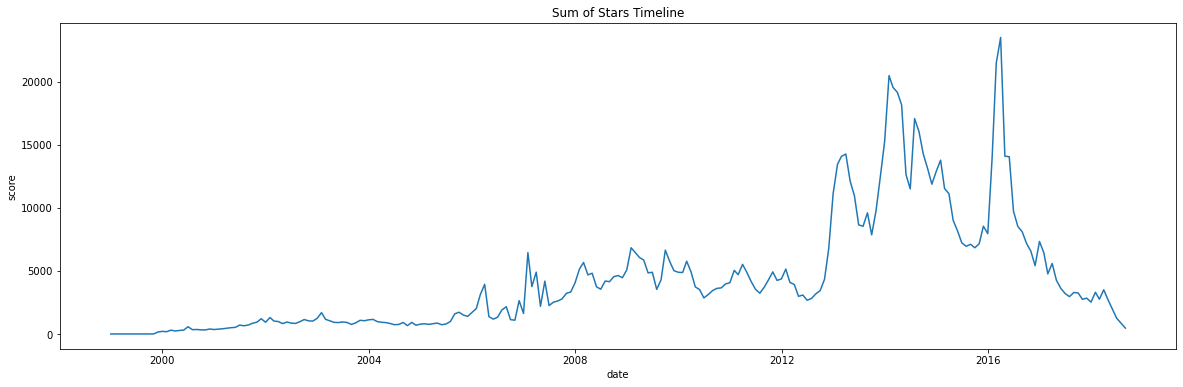

In [26]:
plt.figure(figsize=(20,6))
sns.lineplot(x= 'date' , y= 'score', data=grp_scores_stardf).set_title('Sum of Stars Timeline')
plt.show;

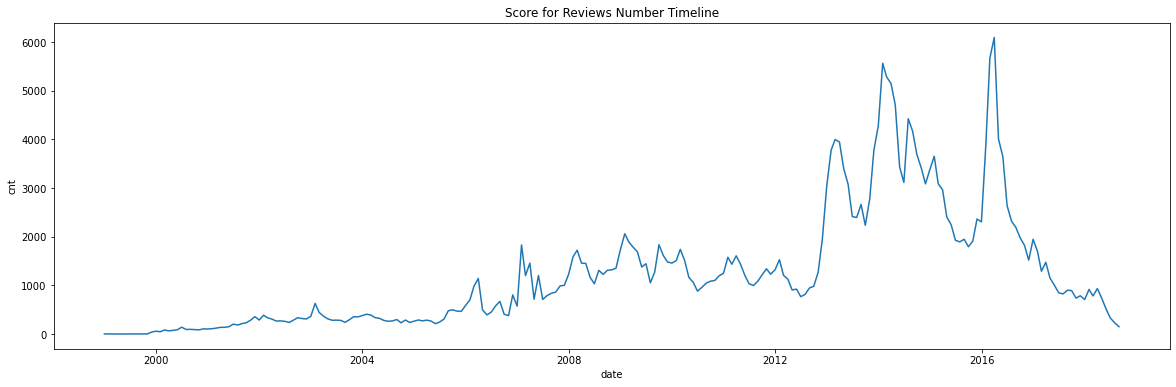

In [27]:
plt.figure(figsize=(20,6))
sns.lineplot(x= 'date' , y= 'cnt', data=grp_scores_stardf).set_title('Score for Reviews Number Timeline')
plt.show;

In [24]:
# Tried one hot encoding for the sku (asin) but was Unable to allocate 181. GiB for an array

#xtst = pd.get_dummies(ds['asin'])
#xtst.head()

In [28]:
unique_asin = ds['asin'].unique()
print(unique_asin)

['0671573535' '1559404779' 'B00002S5B2' ... 'B000098XNA' 'B000A40V9Q'
 'B0002BNWSO']


In [29]:
ds['asin'].describe()

count         292055
unique         13209
top       B00CTTEKJW
freq            7929
Name: asin, dtype: object

In [28]:
# This would be greate but there are too many accounts to execute it

#for asin in ds['asin'].unique():
#    sns.lineplot(x = 'date', y = 'asin', data = ds[ds['asin'] == 'asin'])
#    plt.show;

In [30]:
ds.columns

Index(['asin', 'score', 'reviewText', 'reviewerID', 'summary', 'timestamp',
       'verified', 'date', 'year', 'month', 'day', 'day_of_week', 'cnt'],
      dtype='object')

In [31]:
ds['score'].value_counts()

5    129709
1     65763
4     49150
3     26289
2     21144
Name: score, dtype: int64

In [32]:
ds['reviewerID'].value_counts()

A5JLAU2ARJ0BO     65
A15S4XW3CRISZ5    61
A20DZX38KRBIT8    60
A680RUE1FDO8B     58
A225G2TFM76GYX    49
                  ..
A2T9D3ZI0IC8N5     1
AEF7KF0BPBKWY      1
A1MVKHUB8ETCTT     1
A2IK2B3WEWTQGP     1
A1H5W5TTW5DS7Y     1
Name: reviewerID, Length: 244370, dtype: int64

In [33]:
ds['verified'].value_counts()

true     182205
false    109850
Name: verified, dtype: int64

In [34]:
ds['asin'].value_counts()

B00CTTEKJW    7929
B00E6LJ2SA    4038
B00M9GTHS4    3401
B00EZPXYP4    3294
B015724OVG    2735
              ... 
B001L4RLGK       1
B000OZI9UY       1
B00004T2UZ       1
B000J4GC6S       1
B0002BNWSO       1
Name: asin, Length: 13209, dtype: int64

In [35]:
short_ds_asins = ds[['asin','cnt']]
short_ds_asins.head(1)

,asin,cnt
0,0671573535,1


In [36]:
grp_short_ds_asins = short_ds_asins.groupby(['asin'])['cnt'].agg('count').reset_index()
grp_short_ds_asins.head()

,asin,cnt
0,0077340701,1
1,0077369823,3
2,0077411927,1
3,0077421027,1
4,0077508483,1


In [37]:
grp_short_ds_asins.shape

(13209, 2)

In [38]:
gsda = grp_short_ds_asins
gsda.reset_index(inplace = True, drop = True)
gsda.head()

,asin,cnt
0,0077340701,1
1,0077369823,3
2,0077411927,1
3,0077421027,1
4,0077508483,1


In [39]:
# Filter on rows
# Product reviews above 2,000 reviews:

above_two_thou = gsda[gsda['cnt'] >= 2000]
sorted_above_two_thou = above_two_thou.sort_values(by = ['cnt'], ascending = False)
sorted_above_two_thou.reset_index(inplace = True, drop = True)
sorted_above_two_thou


,asin,cnt
0,B00CTTEKJW,7929
1,B00E6LJ2SA,4038
2,B00M9GTHS4,3401
3,B00EZPXYP4,3294
4,B015724OVG,2735
5,B008RA5A00,2516
6,B008H3SW4I,2211
7,B01637RFR4,2082
8,B01617VPUY,2032


In [40]:
# Filter on rows
# Product reviews above 1,000 reviews:

above_one_thou = gsda[gsda['cnt'] >= 1000 ]
sorted_above_one_thou = above_one_thou.sort_values(by = ['cnt'], ascending = False)
sorted_above_one_thou.reset_index(inplace = True, drop = True)
sorted_above_one_thou.tail()


,asin,cnt
27,B00ENFVLAQ,1076
28,B00E6ONJJU,1070
29,B002DHLUWK,1031
30,B01326J80Q,1009
31,0763855553,1002


In [41]:
# Filter on rows
# Product reviews above 500 reviews:

above_five_hundered = gsda[gsda['cnt'] >= 500 ]
sorted_above_five_hundered = above_five_hundered.sort_values(by = ['cnt'], ascending = False)
sorted_above_five_hundered.reset_index(inplace = True, drop = True)
sorted_above_five_hundered.tail()

,asin,cnt
73,B0056CZC2S,520
74,B013EXEVP4,517
75,B00E6LIECA,514
76,B00B1TGMIS,513
77,B000FK88JK,511


In [42]:
# Score column one hot encoding

score_encoding = pd.get_dummies(ds['score'])
score_encoding.head(10)

,1,2,3,4,5
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,1,0,0,0
5,1,0,0,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


In [43]:
# Dataset of the worst scores

just_score = ds[['asin','score','year']]
just_score

onestar_ds = just_score[just_score['score'] == 1]
onestar_ds.reset_index(inplace = True, drop = True)
onestar_ds.head()

,asin,score,year
0,0671573535,1,1998
1,B00002JV62,1,1999
2,B00002S8R2,1,1999
3,B00002SANR,1,1999
4,B00002SANR,1,1999


In [44]:
onestar_ds.shape

(65763, 3)

In [45]:
grp_onestar_ds = onestar_ds.groupby(['year'])['score'].agg('sum').reset_index()
grp_onestar_ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    21 non-null     int64
 1   score   21 non-null     int64
dtypes: int64(2)
memory usage: 464.0 bytes


In [46]:
grp_onestar_ds

,year,score
0,1998,1
1,1999,13
2,2000,159
3,2001,565
4,2002,931
5,2003,1483
6,2004,1368
7,2005,1380
8,2006,2423
9,2007,3377


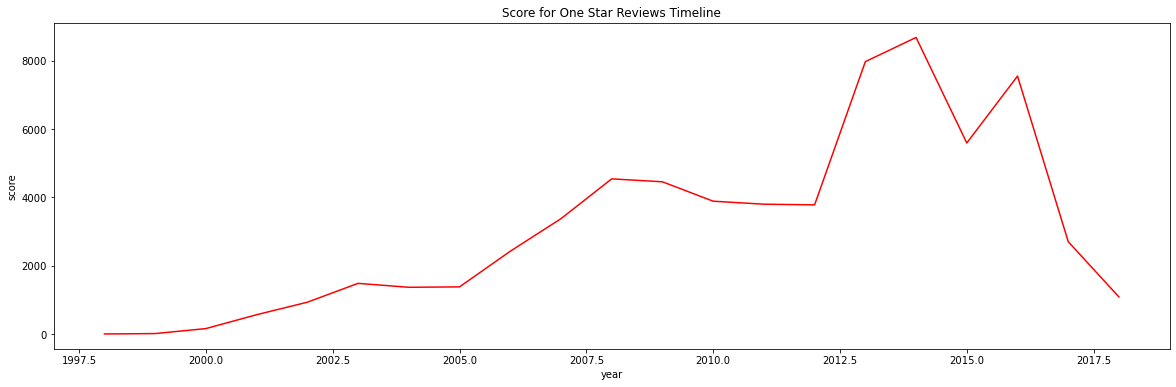

In [47]:
plt.figure(figsize=(20,6))
sns.lineplot(x= 'year' , y= 'score', data=grp_onestar_ds, color = 'red').set_title('Score for One Star Reviews Timeline')
plt.show;

In [48]:
# Dataset of the best scores

just_score = ds[['asin','score','year']]
just_score

fivestar_ds = just_score[just_score['score'] == 5]
fivestar_ds.reset_index(inplace = True, drop = True)
fivestar_ds.head()

,asin,score,year
0,B00002S5B2,5,1999
1,B00002S8D6,5,1999
2,B00002S8D7,5,1999
3,B00002S5H2,5,1999
4,B00002S5H2,5,1999


In [49]:
fivestar_ds.shape

(129709, 3)

In [50]:
grp_fivestar_ds = fivestar_ds.groupby(['year'])['score'].agg('sum').reset_index()
grp_fivestar_ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    20 non-null     int64
 1   score   20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes


In [51]:
grp_fivestar_ds

,year,score
0,1999,220
1,2000,2340
2,2001,4850
3,2002,6950
4,2003,6680
5,2004,5285
6,2005,7700
7,2006,12770
8,2007,23210
9,2008,30165


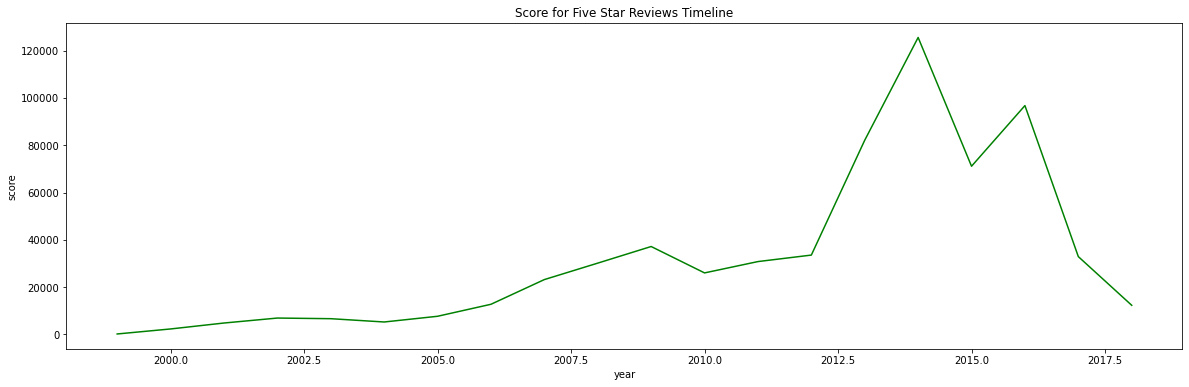

In [52]:
plt.figure(figsize=(20,6))
sns.lineplot(x= 'year' , y= 'score', data=grp_fivestar_ds, color = 'green').set_title('Score for Five Star Reviews Timeline')
plt.show;

In [53]:
# Dataset of review counts

ds_review_counts = ds[['asin','cnt','year']]
grp_ds_review_counts = ds_review_counts.groupby(['year'])['cnt'].agg('sum').reset_index()
grp_ds_review_counts


,year,cnt
0,1998,1
1,1999,97
2,2000,1064
3,2001,2407
4,2002,3663
5,2003,4212
6,2004,3574
7,2005,4365
8,2006,7563
9,2007,12817


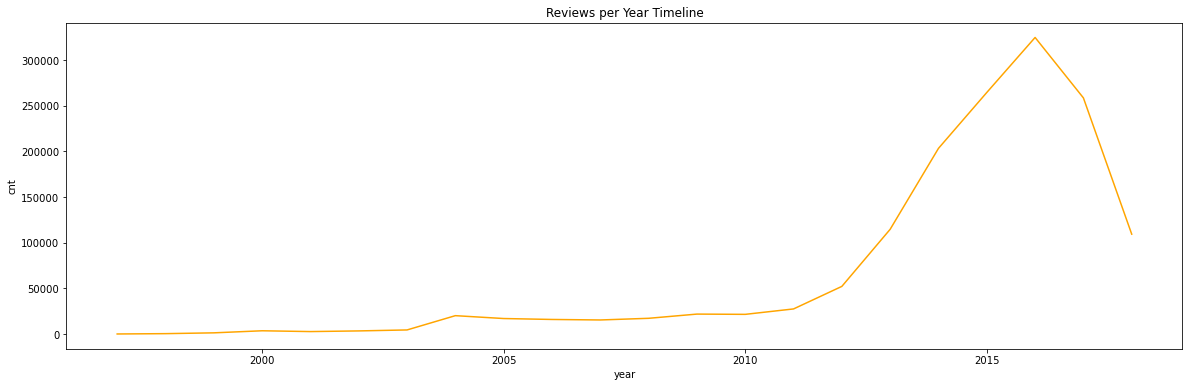

In [53]:
plt.figure(figsize=(20,6))
sns.lineplot(x= 'year' , y= 'cnt', data=grp_ds_review_counts, color = 'orange').set_title('Reviews per Year Timeline')
plt.show;

In [54]:
# Assuming 2018 is incomplete, so checking

ds_yrs = ds[['asin','cnt','year','month']]
ds_yr_2018 = ds_yrs[ds_yrs['year'] == 2018 ]
ds_yr_2018.tail()

,asin,cnt,year,month
1499747,B01EJF0FKQ,1,2018,9
1499748,B01EJFIR92,1,2018,9
1499749,B01ELKP504,1,2018,9
1499750,B01ELB7IY4,1,2018,9
1499751,B01ELFB7J2,1,2018,9


In [55]:
# Indexing with loc

nds = ds.copy()
nds.shape

(1499752, 13)

In [56]:
nds.set_index('asin', inplace = True)
nds.head()

,score,reviewText,reviewerID,summary,timestamp,verified,date,year,month,day,day_of_week,cnt
asin,,,,,,,,,,,,
0871202433,5,"Robert Sylwester's much overlooked book, A Cel...",A2API7H1WS1C56,"A Celebration of Neurons, by Robert Sylwester,",1997-08-09,false,1997-08-09,1997,8,9,5,1
0061535680,1,"Trivia. Dialogue waste of time, paper and add...",AAW5NRUVURHU2,poor entry in derby of books written by lawyers,1997-08-13,false,1997-08-13,1997,8,13,2,1
0316332259,5,Twenty years after his sudden death and a resu...,A1IBMUD9XXD68X,An Icon of His Era And Of All Time,1997-08-17,false,1997-08-17,1997,8,17,6,1
0933149581,3,The author writes about the education of speci...,A1LOZWO9JTN5L8,Wings to Fly: Bringing Theatre Arts to Student...,1997-08-21,false,1997-08-21,1997,8,21,3,1
0356108163,4,A really nice collection of stories by Stephen...,A2ILUXA828DESI,No bones to pick about this book,1997-08-23,false,1997-08-23,1997,8,23,5,1


In [57]:
nds.shape

(1499752, 12)

In [58]:
scoring = ds[['score']]

In [59]:
scoring.shape

(1499752, 1)

In [60]:
scoring['score'].describe()

count    1.499752e+06
mean     4.217880e+00
std      1.248376e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: score, dtype: float64

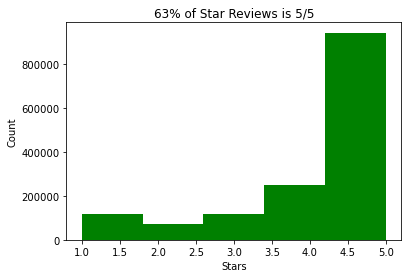

In [61]:
# Create Univariate Histrogram 

import matplotlib as plt
from matplotlib import pyplot

#%matplotlib line
plt.pyplot.hist(scoring, bins=5, color = 'green'); 

plt.pyplot.xlabel("Stars");
plt.pyplot.ylabel("Count");
plt.pyplot.title("63% of Star Reviews is 5/5");

In [62]:
asin_hist_ds = ds[['asin','cnt']]
grp_asin_hist_ds = asin_hist_ds.groupby(['asin'])['cnt'].agg('sum').reset_index()
grp_asin_hist_ds.head()

,asin,cnt
0,0000000116,2
1,0000000868,1
2,0000004545,2
3,0000013765,10
4,0000038504,2


In [63]:
grp_asin_hist_ds['cnt'].describe()

count    129876.000000
mean         11.547568
std          71.825654
min           1.000000
25%           1.000000
50%           2.000000
75%           9.000000
max        6114.000000
Name: cnt, dtype: float64

In [65]:
ds.columns

Index(['asin', 'score', 'reviewText', 'reviewerID', 'summary', 'timestamp',
       'verified', 'date', 'year', 'month', 'day', 'day_of_week', 'cnt'],
      dtype='object')

In [66]:
# Acronym of Machine Learning Data Set for the compact tabular format of key data then:

mlds = ds[['date','asin','summary','reviewText','score']]
mlds.head()

,date,asin,summary,reviewText,score
0,1997-08-09,0871202433,"A Celebration of Neurons, by Robert Sylwester,","Robert Sylwester's much overlooked book, A Cel...",5
1,1997-08-13,0061535680,poor entry in derby of books written by lawyers,"Trivia. Dialogue waste of time, paper and add...",1
2,1997-08-17,0316332259,An Icon of His Era And Of All Time,Twenty years after his sudden death and a resu...,5
3,1997-08-21,0933149581,Wings to Fly: Bringing Theatre Arts to Student...,The author writes about the education of speci...,3
4,1997-08-23,0356108163,No bones to pick about this book,A really nice collection of stories by Stephen...,4


In [68]:
# Loading clean sample data set for machine learning next step with target variable score

mlds.to_parquet('sample_ds_for_ml_7292023pm.parquet')

***

## Disclaimer:

1. *Insights are for the current data set scope which is not the entire data set. This process needs to be iterative or the data set comprehensive for insights to be final. If the sample is representative of the larger data set, then we can use them "as is".*
2. *We will be able to include correlations once metadata is joined with the asins of the data set* 
3. *Data set includes 1'499,752 records which is 1% from the 80% of the entire data set.*

***

# Insights

***

- From the 1'499,752 reviews, only 325 asin have more or equal than 500 reviews.
- There is an overall trend towards more reviews over time which is a good thing as more data can be leveraged on, however, the trend reaches it's peak at year 2016 and then goes back in 2017 to a similar data point as the year prior to the peak (back to 2015 numbers). Then 2018 while incomplete, still seems to now might be less than 2015 yet data might be incomplete so needs to be confirmed once the 2018 data is complete. 
- Score/Review of 1 star only accounts for 117,964 of the 1'499,752 reviews which is 7.87%.
- Score/Review of 4 stars accounts for 249,879 of the 1'499,752 reviews which is 16.66%.
- Score/Review of 5 stars accounts for 942,098 of the 1'499,752 reviews which is 62.82%.


***

# Key Insights

***

##### Ratio of review scoring remains stagnated over time. So neither improvement nor decline over product's reviews. Thus, leveraging on the positive feedback provided takes us to the next point which is the prescriptive analytics phase ...

### It is an overwhelming mayority of positive reviews *(79.48% with either 5 or 4 stars and mean of 4.21 stars)* which allows to better extract what is that consumers like and/or enjoy the most which allows to suggest new products and/or predict customer satisfaction per market needs.

.